## If a tree falls in the Forest: Random Forest vs. Decision Tree [accuracy & cost test]
In this notebook, I'll compare the Decision Tree algorithm against Random Forest. As we know, Random Forest Classifier is the robust version of the Decision Tree. For this purpose, I picked a Pulsar Star dataset from Kaggle. The goal is to compare the runtime and accuracy of the two algorithms.

In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import time

In [9]:
# load the dataset
df = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 3\data\pulsar_stars.csv')
df.head()               

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


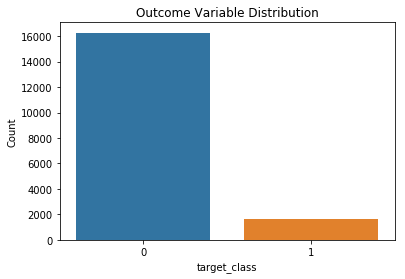

In [12]:
_ = sns.countplot(x = 'target_class', data = df)
_.set(title = 'Outcome Variable Distribution', ylabel = 'Count')
plt.show()

Our dataset has 9 columns and 17898 entries. There are no missing values in the dataset. Also, 8 variables are continuous and only outcome variable (target_class) is binary represented.  The target_class column shows the class of pulsar star. 1 for pulsar star, 0 for not a star.

### Model 1. Random Forest Classifier

In [14]:
start_time = time.time()

# random forest classifier
rfc = ensemble.RandomForestClassifier()

# define input and outcome variables
X = df.drop('target_class', 1)
Y = df.target_class

# normalization
scalerX = MinMaxScaler(feature_range = (0,1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

# fit the model
rfc.fit(X,Y)

# predicted outcome variable
Y_rfc = rfc.predict(X)

print('score: ', rfc.score(X,Y))
score = cross_val_score(rfc, X, Y, cv = 10)
print('R-squared: ', r2_score(Y, Y_rfc))
print("10 folds cross-validation Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("\n--- %s seconds ---" % (time.time() - start_time))

C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


score:  0.9968152866242038
R-squared:  0.9617169461051487
10 folds cross-validation Accuracy: 0.98 (+/- 0.01)

--- 6.282105207443237 seconds ---


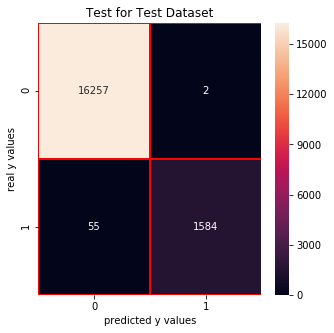

In [19]:
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(Y, Y_rfc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()


### Model 2. Decision Trees Classifier

In [5]:
start_time = time.time()

# decision tree classifier
dtc = DecisionTreeClassifier()

# define input and outcome variables
X = df.drop('target_class', 1)
Y = df.target_class

# normalization
scalerX = MinMaxScaler(feature_range = (0,1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

# fit the model
dtc.fit(X,Y)

# predicted outcome variable
Y_dtc = dtc.predict(X)

print('score: ', dtc.score(X,Y))
score = cross_val_score(dtc, X, Y, cv = 10)
print('R-squared: ', r2_score(Y, Y_dtc))
print('10 folds cross-validation accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() * 2))
print('\n-- %s seconds --' %(time.time()- start_time))

score:  1.0
R-squared:  1.0
10 folds cross-validation accuracy: 0.97 (+/-0.01)

-- 3.868577480316162 seconds --


### Model 3. Decision Trees Classifier [playing with configuration]

The calculation above shows that the Decision Tree Classifiers runs faster than Random Forest. However, R-squared is 1 which makes me doubt about overfitting. The model seems to be complex and needs to be simplified. I'll try the next model with a reduced number of features and tree depth.

In [6]:
start_time = time.time()

# configured decision tree classifier 
dtc = DecisionTreeClassifier(criterion = 'entropy', max_features = 6, max_depth = 9, random_state = 42)

# define input variables and outcome variable
X = df.drop('target_class', 1)
Y = df.target_class

# normalization
scalerX = MinMaxScaler(feature_range = (0,1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

# fit the model
dtc.fit(X,Y)

# predicted outcome variable
Y_dtc = dtc.predict(X)

print('score: ', dtc.score(X,Y))
score = cross_val_score(dtc, X, Y, cv = 10)
print('R-squared: ', r2_score(Y, Y_dtc))
print('10 folds cross-validation accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() * 2))
print('\n-- %s seconds --' %(time.time()- start_time))

score:  0.9875963794837412
R-squared:  0.8508975795674211
10 folds cross-validation accuracy: 0.98 (+/-0.01)

-- 3.0406219959259033 seconds --


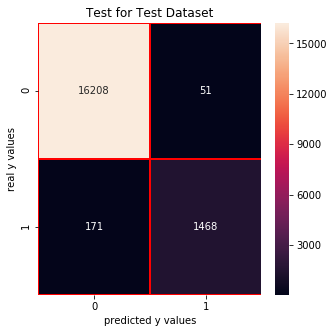

In [20]:
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(Y, Y_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

After playing with the number of features and the depth of the tree, I came up with the optimal parameters for the model as the number of maximum features 6 and the maximum depth of tree 9. The deeper tree, the longer it takes to run, but still faster than Random Forest though it's less accurate. 